In [5]:
import matplotlib.pyplot as plt
import numpy as np
import control as ct
from scipy.linalg import eig
from scipy.integrate import solve_ivp

# Datos del sistema
R = 2.27
L = 0.0047
Km = 0.25
Kb = 0.25
B = 0.003026
J = 0.00246
A = [[-R/L,-Kb/L],[Km/J,-B/J]]
polos = eig(A)
print(polos)

(array([-471.48356309+0.j,  -12.72524162+0.j]), array([[-0.9774358 ,  0.11239564],
       [ 0.21123269, -0.99366353]]))


In [52]:
T = [] # Almacenar los tiempos que llaman a f
TL = []
V = [] # Almacenar los valores de V durante el llamdo a f
# Funcion de ecaucione diferencial
def f(t,x):
    i = x[0]
    w = x[1]
    if t<0.1:
        v = 0
    else:
        v = 12
    if t<0.5:
        Tl = 0
    else:
        Tl = 0.5
    V.append(v)
    TL.append(Tl) 
    T.append(t)
    f1 = -R/L*i-Kb/L*w + 1/L*v
    f2 = Km/J*i-B/J*w-1/J*Tl
    return [f1,f2]
# solución de la ecuación diferencial
resultado = solve_ivp(f,[0,1],[0,0])
# Tensión y carga
Vin = []
Tl = []
IDX = []
for k in resultado.t:
    for j in range(len(V)):
        if k == T[j]:
            idx = j
    Vin.append(V[idx])
    Tl.append(TL[idx])

(40.0, 45.0)

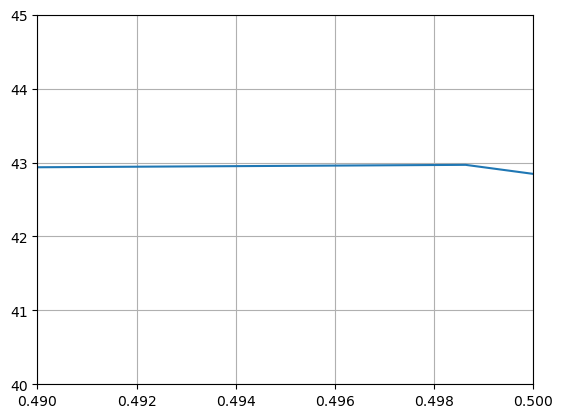

In [54]:
plt.plot(resultado.t,resultado.y[1])
plt.plot(resultado.t,Vin)
plt.plot(resultado.t,Tl)
plt.grid()
plt.xlim(0.49,0.5)
plt.ylim(40,45)

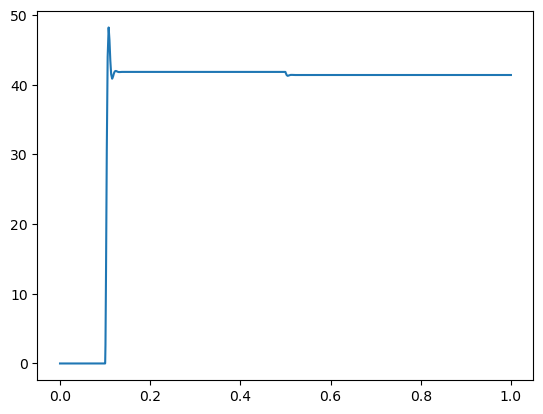

In [58]:
T = [] # Almacenar los tiempos que llaman a f
TL = []
V = [] # Almacenar los valores de V durante el llamdo a f
E = []
WR = []
K = 10 # valor del controlador
# Funcion de ecaucione diferencial
def f(t,x):
    i = x[0]
    w = x[1]

    # Entrada
    if t<0.1:
        wr = 0
    else:
        wr = 43
    if t<0.5:
        Tl = 0
    else:
        Tl = 0.5
    # Tensión
    error = wr - w
    v = K*(error)
    V.append(v)
    TL.append(Tl) 
    T.append(t)
    E.append(error)
    WR.append(wr)
    f1 = -R/L*i-Kb/L*w + 1/L*v
    f2 = Km/J*i-B/J*w-1/J*Tl
    return [f1,f2]
# solución de la ecuación diferencial
resultado = solve_ivp(f,[0,1],[0,0])
# Tensión y carga
Vin = []
Tl = []
IDX = []
for k in resultado.t:
    for j in range(len(V)):
        if k == T[j]:
            idx = j
    Vin.append(V[idx])
    Tl.append(TL[idx])


plt.plot(resultado.t,resultado.y[1])



In [38]:
T

[0.0,
 1e-06,
 2e-07,
 3e-07,
 8e-07,
 8.888888888888888e-07,
 1e-06,
 1e-06,
 3e-06,
 4e-06,
 9e-06,
 9.888888888888889e-06,
 1.1e-05,
 1.1e-05,
 3.0999999999999995e-05,
 4.0999999999999994e-05,
 9.099999999999999e-05,
 9.988888888888888e-05,
 0.00011099999999999999,
 0.00011099999999999999,
 0.00031099999999999997,
 0.00041099999999999996,
 0.000911,
 0.0009998888888888887,
 0.001111,
 0.001111,
 0.0031109999999999996,
 0.004111,
 0.009110999999999998,
 0.009999888888888888,
 0.011111,
 0.011111,
 0.031110999999999996,
 0.041110999999999995,
 0.09111099999999998,
 0.09999988888888886,
 0.11111099999999997,
 0.11111099999999997,
 0.015111,
 0.017110999999999998,
 0.027110999999999996,
 0.028888777777777774,
 0.031110999999999996,
 0.031110999999999996,
 0.035110999999999996,
 0.03711099999999999,
 0.04711099999999999,
 0.04888877777777777,
 0.05111099999999999,
 0.05111099999999999,
 0.09111099999999997,
 0.11111099999999996,
 0.21111099999999994,
 0.2288887777777777,
 0.2511109999999

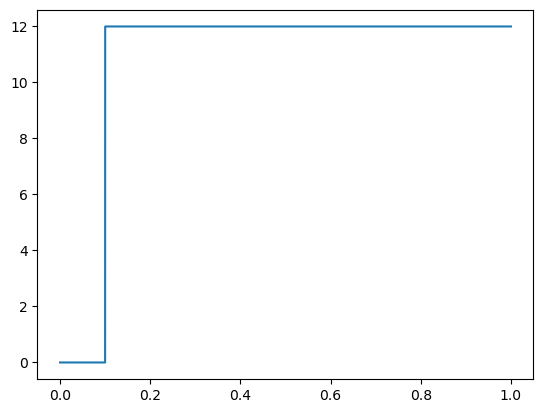

In [48]:

plt.plot(resultado.t,Vin)

In [85]:
# Lugar de las raíces
Gp = ct.tf([Km/J/L],[1,R/L,Kb*Km/J/L])
Gp.poles()
r,k = ct.rlocus(Gp,plot=False)

In [86]:
#Factor de amortiguamiento


array([[-471.5143009 +0.00000000e+00j,  -11.46442251+0.00000000e+00j],
       [-461.31250031+0.00000000e+00j,  -21.66622309+0.00000000e+00j],
       [-450.61361158+0.00000000e+00j,  -32.36511183+0.00000000e+00j],
       [-439.3370089 +0.00000000e+00j,  -43.6417145 +0.00000000e+00j],
       [-427.37758381+0.00000000e+00j,  -55.60113959+0.00000000e+00j],
       [-414.59386984+0.00000000e+00j,  -68.38485357+0.00000000e+00j],
       [-400.78754234+0.00000000e+00j,  -82.19118107+0.00000000e+00j],
       [-385.66512239+0.00000000e+00j,  -97.31360101+0.00000000e+00j],
       [-368.75832723+0.00000000e+00j, -114.22039617+0.00000000e+00j],
       [-351.70751897+0.00000000e+00j, -131.27120444+0.00000000e+00j],
       [-331.48211026+0.00000000e+00j, -151.49661314+0.00000000e+00j],
       [-325.66986981+0.00000000e+00j, -157.3088536 +0.00000000e+00j],
       [-319.42536811+0.00000000e+00j, -163.55335529+0.00000000e+00j],
       [-312.63487629+0.00000000e+00j, -170.34384711+0.00000000e+00j],
      